In [1]:
import pandas as pd
import requests
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
import time
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('active_players.csv')

In [3]:
country_count = df.groupby('COUNTRY')['COUNTRY'].count().sort_values(ascending = False)

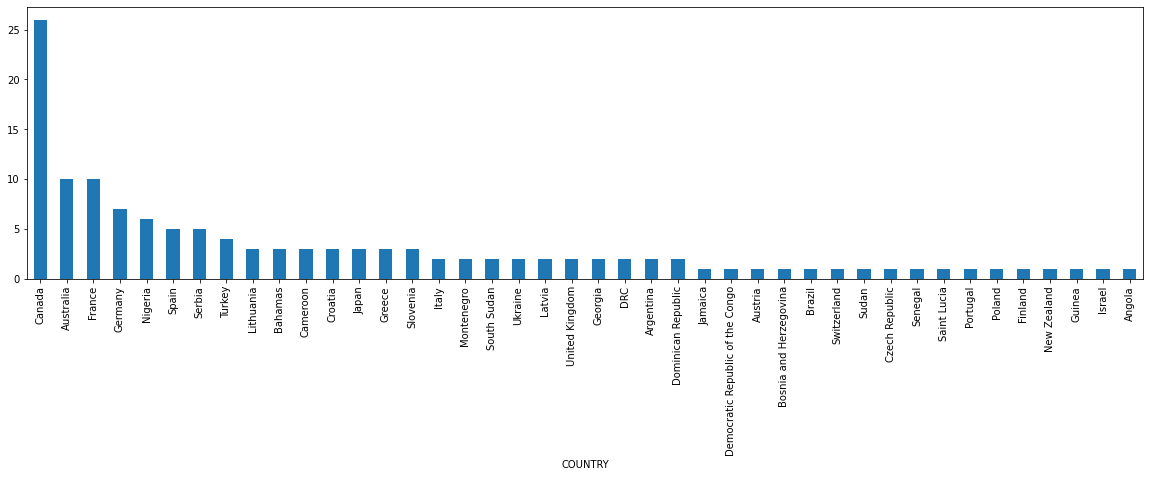

In [4]:
country_lss_thn_30 = country_count.loc[country_count < 30]

plt.figure(figsize=(20, 5))
country_lss_thn_30.plot(kind="bar")
plt.show()

In [5]:
schools_count = df.groupby('SCHOOL')['SCHOOL'].count().sort_values(ascending = False)
# .reset_index(name='count').sort_values(['count'], ascending=False)

schools_grtr_thn_5 = schools_count.loc[schools_count > 5]

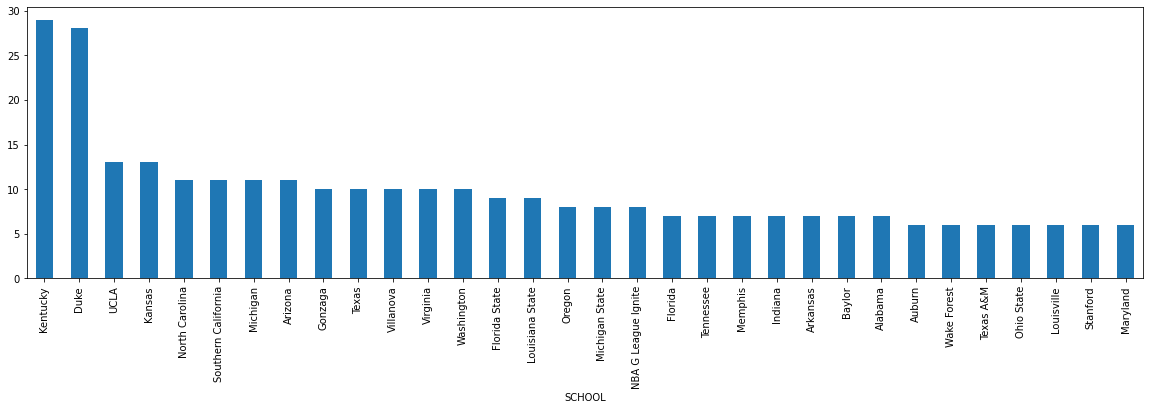

In [6]:
plt.figure(figsize=(20, 5))
schools_grtr_thn_5.plot(kind="bar")
plt.show()

In [7]:
schools_less_than_3 = schools_count.loc[schools_count < 3]

schools_less_than_3

SCHOOL
New Zealand Breakers    2
Notre Dame              2
Xavier                  2
Washington State        2
Mississippi State       2
                       ..
Lipscomb                1
Lehigh                  1
Le Mans                 1
John A. Logan           1
Zaragoza                1
Name: SCHOOL, Length: 126, dtype: int64

In [11]:
df = df.drop(columns=[
    'Unnamed: 0', 
    'DISPLAY_LAST_COMMA_FIRST', 
    'DISPLAY_FIRST_LAST', 
    'DISPLAY_FI_LAST', 
    'PLAYER_SLUG', 
    'PLAYERCODE', 
    'GAMES_PLAYED_CURRENT_SEASON_FLAG', 
    'TEAM_ID', 
    'TEAM_CODE', 
    'DLEAGUE_FLAG'
])

In [12]:
df.sort_values('HEIGHT')

,PERSON_ID,FIRST_NAME,LAST_NAME,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,FROM_YEAR,TO_YEAR,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
96,1629185,Chris,Chiozza,1995-11-21T00:00:00,Florida,USA,Florida/USA,5-11,175.0,5,2.0,Guard,Inactive,Warriors,GSW,Golden State,2018.0,2021.0,Y,Y,Undrafted,Undrafted,Undrafted,N
94,1631113,Kennedy,Chandler,2002-09-16T00:00:00,Tennessee,USA,Tennessee/USA,5-11,170.0,0,1.0,Guard,Active,Grizzlies,MEM,Memphis,2022.0,2022.0,Y,Y,2022,2,38,N
576,1630593,McKinley,Wright IV,1998-10-25T00:00:00,Colorado,USA,Colorado/USA,5-11,192.0,1,23.0,Guard,Active,Mavericks,DAL,Dallas,2021.0,2022.0,Y,Y,Undrafted,Undrafted,Undrafted,N
244,1631309,Trevor,Hudgins,1999-03-23T00:00:00,Northwest Missouri State,USA,Northwest Missouri State/USA,6-0,180.0,0,12.0,Guard,Active,Rockets,HOU,Houston,2022.0,2022.0,Y,Y,Undrafted,Undrafted,Undrafted,N
366,1630558,Davion,Mitchell,1998-09-05T00:00:00,Baylor,USA,Baylor/USA,6-0,202.0,1,15.0,Guard,Active,Kings,SAC,Sacramento,2021.0,2022.0,Y,Y,2021,1,9,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1631342,Daeqwon,Plowden,1998-08-29T00:00:00,Bowling Green,USA,Bowling Green/USA,NaN,NaN,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,N,Y,Undrafted,Undrafted,Undrafted,N
439,1631311,Lester,Quinones,2000-11-16T00:00:00,Memphis,USA,Memphis/USA,NaN,NaN,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,N,Y,Undrafted,Undrafted,Undrafted,N
482,1631301,Jaylen,Sims,1998-12-11T00:00:00,North Carolina-Wilmington,USA,North Carolina-Wilmington/USA,NaN,NaN,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,N,Y,Undrafted,Undrafted,Undrafted,N
494,1630311,Pat,Spencer,1996-07-04T00:00:00,Northwestern,USA,Northwestern/USA,NaN,NaN,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,N,Y,Undrafted,Undrafted,Undrafted,N


<Figure size 1440x360 with 0 Axes>

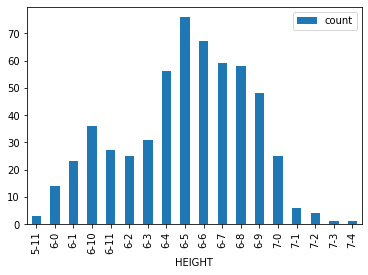

In [21]:
plt.figure(figsize=(20, 5))
height_count.plot(kind="bar")
plt.show()

Unfortunately the strings of 6-10 and 6-11 fall between 6'1" and 6'2"

In [24]:
df.groupby(['POSITION', 'HEIGHT'])['HEIGHT'].count().reset_index(name='count').sort_values(['POSITION'])

,POSITION,HEIGHT,count
0,Center,6-10,10
1,Center,6-11,13
2,Center,6-8,2
3,Center,6-9,2
4,Center,7-0,13
5,Center,7-1,4
6,Center,7-2,2
7,Center,7-4,1
12,Center-Forward,7-1,1
11,Center-Forward,7-0,6


In [25]:
world_pop = pd.read_csv('population_by_country_2020.csv')

In [26]:
world_pop['YearlyChangeFloat'] = world_pop['Yearly Change'].str.slice(0,4).astype(float)
world_pop['Population (2021)'] = world_pop['Population (2020)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2022)'] = world_pop['Population (2021)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2023)'] = world_pop['Population (2022)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,YearlyChangeFloat,Population (2021),Population (2022),Population (2023)
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %,0.39,1.445915e+11,1.451554e+13,1.457215e+15
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %,0.99,1.396030e+11,1.409851e+13,1.423809e+15
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %,0.59,3.332960e+10,3.352624e+12,3.372405e+14
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %,1.07,2.769536e+10,2.799170e+12,2.829122e+14
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %,2.00,2.260450e+10,2.305659e+12,2.351773e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %,0.06,4.995996e+05,4.998993e+07,5.001993e+09
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %,3.05,3.603658e+05,3.713570e+07,3.826834e+09
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %,0.68,1.639070e+05,1.650216e+07,1.661438e+09
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %,1.27,1.377272e+05,1.394763e+07,1.412477e+09
